In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import streamlit
import joblib


In [2]:
df=pd.read_csv('telco_customer_preprocessed.csv')

In [3]:
df.head()

,SeniorCitizen,tenure,Churn,MonthlyCharges_scaled,TotalCharges_scaled,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,InternetService_FE,OnlineSecurity_FE,OnlineBackup_FE,DeviceProtection_FE,TechSupport_FE,StreamingTV_FE,StreamingMovies_FE,Contract_FE,PaperlessBilling_FE,PaymentMethod_FE
0,0,1,0,-1.160323,0.001275,1,0,0,1,1,...,0.343746,0.496663,0.344881,0.439443,0.493114,0.398978,0.395428,0.550192,0.592219,0.335794
1,0,34,0,-0.259629,0.215867,0,1,1,0,1,...,0.343746,0.286668,0.438450,0.343888,0.493114,0.398978,0.395428,0.209144,0.407781,0.228880
2,0,2,1,-0.362660,0.010310,0,1,1,0,1,...,0.343746,0.286668,0.344881,0.439443,0.493114,0.398978,0.395428,0.550192,0.592219,0.228880
3,0,45,0,-0.746535,0.210241,0,1,1,0,1,...,0.343746,0.286668,0.438450,0.343888,0.290217,0.398978,0.395428,0.209144,0.407781,0.219225
4,0,2,1,0.197365,0.015330,1,0,1,0,1,...,0.439585,0.496663,0.438450,0.439443,0.493114,0.398978,0.395428,0.550192,0.592219,0.335794


RFE Type Feature Selection

tenure,                  
MonthlyCharges_scaled,    
TotalCharges_scaled,
gender_Male,     
gender_Female,         
OnlineBackup_FE,          
InternetService_FE,        
OnlineSecurity_FE,        
TechSupport_FE,        
Contract_FE,        
PaymentMethod_FE,        
PaperlessBilling_FE,      
MultipleLines_FE,       
DeviceProtection_FE,       
Partner_Yes,  
Partner_No,     
SeniorCitizen,            
Dependents_No,
Dependents_Yes,          
StreamingTV_FE            
StreamingMovies_FE        

In [4]:
# ...existing code...

feature = df[
    [
        'tenure', 'MonthlyCharges_scaled', 'TotalCharges_scaled', 'gender_Male', 'gender_Female',
        'OnlineBackup_FE', 'InternetService_FE', 'OnlineSecurity_FE', 'TechSupport_FE', 'Contract_FE',
        'PaymentMethod_FE', 'PaperlessBilling_FE', 'MultipleLines_FE', 'DeviceProtection_FE',
        'Partner_Yes', 'Partner_No', 'SeniorCitizen', 'Dependents_No', 'Dependents_Yes',
        'StreamingTV_FE', 'StreamingMovies_FE'
    ]
]
# ...existing code...

In [5]:
# ...existing code...

feature = df[
    [
        'tenure', 'MonthlyCharges_scaled', 'TotalCharges_scaled', 'gender_Male', 'gender_Female',
        'OnlineBackup_FE', 'InternetService_FE', 'OnlineSecurity_FE', 'TechSupport_FE', 'Contract_FE',
        'PaymentMethod_FE', 'PaperlessBilling_FE', 'MultipleLines_FE', 'DeviceProtection_FE',
        'Partner_Yes', 'Partner_No', 'SeniorCitizen', 'Dependents_No', 'Dependents_Yes',
        'StreamingTV_FE', 'StreamingMovies_FE'
    ]
]
# ...existing code...
target = df['Churn']

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=42)

In [7]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [8]:
model.fit(X_train,y_train)

c:\Users\anton\OneDrive\Desktop\Telecome-project\telecomenvironment\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [9]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.82


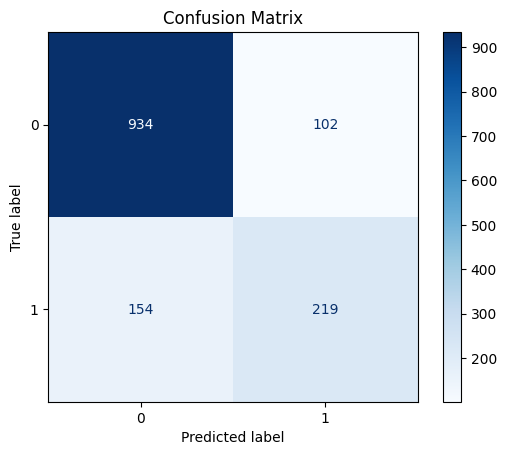

Accuracy:  0.82
Precision: 0.68
Recall:    0.59
F1 Score:  0.63
True Positives:  219
False Positives: 102
True Negatives:  934
False Negatives: 154


In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score

# Predict
y_pred = model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# True/False Positives/Negatives
tn, fp, fn, tp = cm.ravel()

print(f"Accuracy:  {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall:    {recall:.2f}")
print(f"F1 Score:  {f1:.2f}")
print(f"True Positives:  {tp}")
print(f"False Positives: {fp}")
print(f"True Negatives:  {tn}")
print(f"False Negatives: {fn}")

In [11]:
from sklearn.metrics import classification_report

# ...existing code...

# Classification report for macro avg and weighted avg
report = classification_report(y_test, y_pred, digits=2)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.59      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.76      1409
weighted avg       0.81      0.82      0.81      1409



----Summary:----

""""Macro avg:"""" Good for understanding performance on all classes equally, but can be misleading if classes are imbalanced.

""""Weighted avg:"""" Gives a more realistic overall score when classes are imbalanced, as it reflects the true distribution of the data.

-----In practice:----

"""""Use weighted avg""""" for overall model performance when your dataset is imbalanced.

"""""Use macro avg""""" to see how your model performs on each class, regardless of their frequency.

In [12]:
##################################################################

So Take Weighted Average - Because our dataset has imbalanced

In [13]:
########################################################################

Find Loss Value

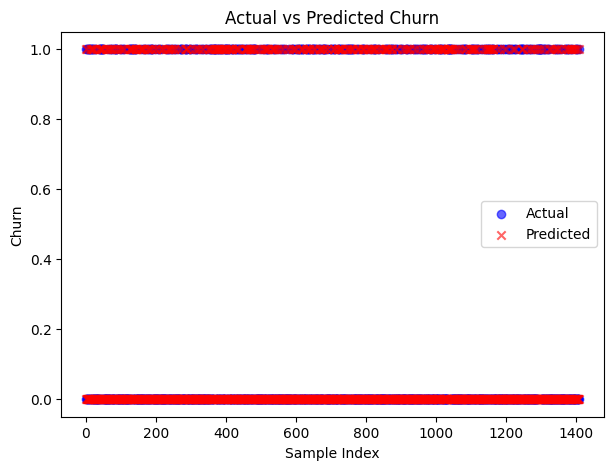

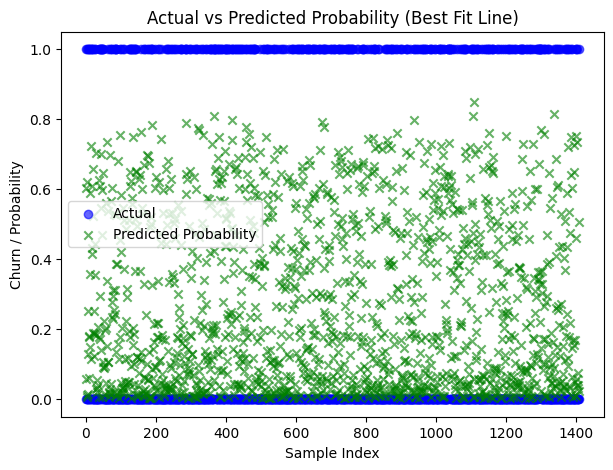

In [14]:
import matplotlib.pyplot as plt

# Scatter plot for Actual vs Predicted values
plt.figure(figsize=(7, 5))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual', alpha=0.6)
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted', alpha=0.6, marker='x')
plt.title('Actual vs Predicted Churn')
plt.xlabel('Sample Index')
plt.ylabel('Churn')
plt.legend()
plt.show()

# Optional: Best fit line for classification (shows probability)
y_proba = model.predict_proba(X_test)[:, 1]
plt.figure(figsize=(7, 5))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual', alpha=0.6)
plt.scatter(range(len(y_proba)), y_proba, color='green', label='Predicted Probability', alpha=0.6, marker='x')
plt.title('Actual vs Predicted Probability (Best Fit Line)')
plt.xlabel('Sample Index')
plt.ylabel('Churn / Probability')
plt.legend()
plt.show()

Calculate loss Function

In [15]:
from sklearn.metrics import log_loss

# Predict probabilities for log loss
y_proba = model.predict_proba(X_test)

# Calculate log loss
loss = log_loss(y_test, y_proba)
print(f"Log Loss: {loss:.4f}")

Log Loss: 0.3995


#### """ Log loss is based on probability, not just class prediction. """ ####

It is the standard loss for classification with probabilistic outputs (like softmax/sigmoid).
Backpropagation minimizes log loss to improve model predictions

########################################################################################

Logistic Regression in scikit-learn and most ML libraries is trained using a variant of gradient descent (such as LBFGS, SAG, or liblinear solvers).

After SGDClassifier type gradient descent to reduce loss its increase log loss and reduce accuracy so leave it 0.39 is not huge

In [16]:
########################################################################################

So Now am Trying SVM Classifier

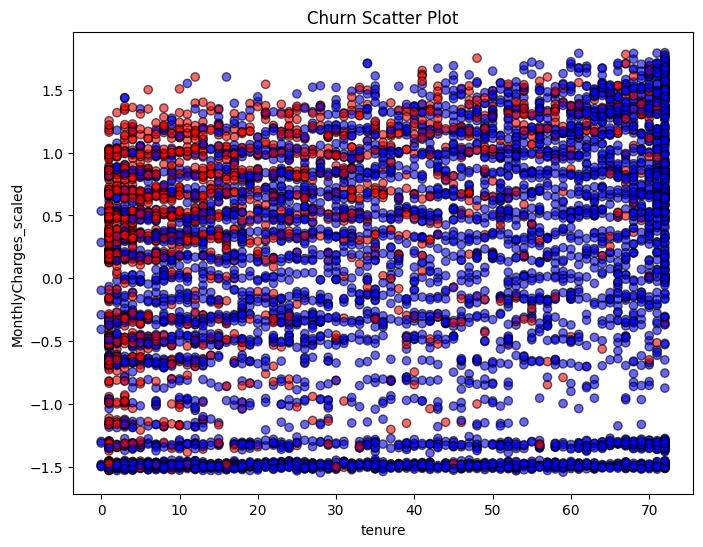

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df['tenure'], df['MonthlyCharges_scaled'], c=df['Churn'], cmap='bwr', alpha=0.6, edgecolor='k')
plt.xlabel('tenure')
plt.ylabel('MonthlyCharges_scaled')
plt.title('Churn Scatter Plot')
plt.show()

This is not linearly seperable its mixed with all class its not suited for Hard Margin, so used for soft margin

In [19]:
from sklearn.svm import SVC

# Use all your selected features for SVM model training
X = df[
    [
        'tenure', 'MonthlyCharges_scaled', 'TotalCharges_scaled', 'gender_Male', 'gender_Female',
        'OnlineBackup_FE', 'InternetService_FE', 'OnlineSecurity_FE', 'TechSupport_FE', 'Contract_FE',
        'PaymentMethod_FE', 'PaperlessBilling_FE', 'MultipleLines_FE', 'DeviceProtection_FE',
        'Partner_Yes', 'Partner_No', 'SeniorCitizen', 'Dependents_No', 'Dependents_Yes',
        'StreamingTV_FE', 'StreamingMovies_FE'
    ]
].values
y = df['Churn'].values

# Train SVM with all features (no 2D plot)
svm_soft = SVC(kernel='linear', C=1.0, probability=True)
svm_soft.fit(X, y)

svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True)
svm_rbf.fit(X, y)

# You can now use svm_soft and svm_rbf for predictions and evaluation:
y_pred_soft = svm_soft.predict(X)
y_pred_rbf = svm_rbf.predict(X)

# Example: print accuracy
from sklearn.metrics import accuracy_score
print("Soft Margin SVM Accuracy:", accuracy_score(y, y_pred_soft))
print("RBF SVM Accuracy:", accuracy_score(y, y_pred_rbf))

Soft Margin SVM Accuracy: 0.8019309953144966
RBF SVM Accuracy: 0.787164560556581


In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, log_loss, classification_report

# Predict on test set
y_pred_soft = svm_soft.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)
y_proba_soft = svm_soft.predict_proba(X_test)
y_proba_rbf = svm_rbf.predict_proba(X_test)

print("Soft Margin SVM:")
print("Accuracy:", accuracy_score(y_test, y_pred_soft))
print("Precision:", precision_score(y_test, y_pred_soft))
print("Recall:", recall_score(y_test, y_pred_soft))
print("F1 Score:", f1_score(y_test, y_pred_soft))
print("Log Loss:", log_loss(y_test, y_proba_soft))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_soft))
print(classification_report(y_test, y_pred_soft))

print("\nRBF SVM:")
print("Accuracy:", accuracy_score(y_test, y_pred_rbf))
print("Precision:", precision_score(y_test, y_pred_rbf))
print("Recall:", recall_score(y_test, y_pred_rbf))
print("F1 Score:", f1_score(y_test, y_pred_rbf))
print("Log Loss:", log_loss(y_test, y_proba_rbf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rbf))
print(classification_report(y_test, y_pred_rbf))

c:\Users\anton\OneDrive\Desktop\Telecome-project\telecomenvironment\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Users\anton\OneDrive\Desktop\Telecome-project\telecomenvironment\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Users\anton\OneDrive\Desktop\Telecome-project\telecomenvironment\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Users\anton\OneDrive\Desktop\Telecome-project\telecomenvironment\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


Soft Margin SVM:
Accuracy: 0.8190205819730305
Precision: 0.6855345911949685
Recall: 0.5844504021447721
F1 Score: 0.6309696092619392
Log Loss: 0.4003735607500737
Confusion Matrix:
 [[936 100]
 [155 218]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.76      1409
weighted avg       0.81      0.82      0.81      1409


RBF SVM:
Accuracy: 0.7927608232789212
Precision: 0.6708860759493671
Recall: 0.4262734584450402
F1 Score: 0.521311475409836
Log Loss: 0.46779469714781
Confusion Matrix:
 [[958  78]
 [214 159]]
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1036
           1       0.67      0.43      0.52       373

    accuracy                           0.79      1409
   macro avg       0.74      0.68      0.69      1409
weigh

#############################################################################################

so Log Loss of SVM is 0.46 but i got logistic regression is 0.39 so i move to Logistic regression

###########################################################################################################

ROC AUC: 0.8623


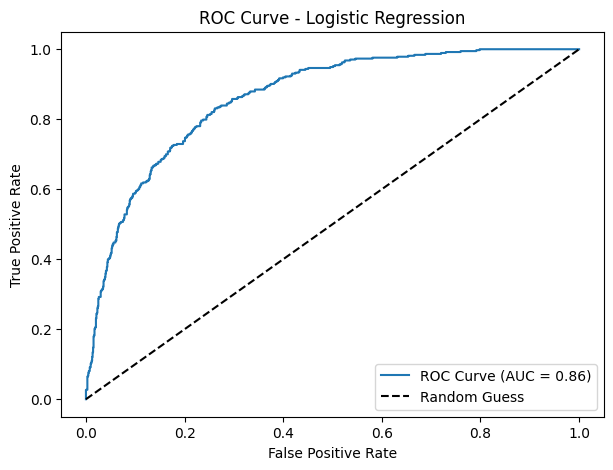

In [24]:
from sklearn.metrics import roc_auc_score, roc_curve

# Predict probabilities for the positive class
y_proba = model.predict_proba(X_test)[:, 1]

# Calculate ROC AUC
auc = roc_auc_score(y_test, y_proba)
print(f"ROC AUC: {auc:.4f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.show()

This Model is Good because its reduce False Positive Rate and Increase True Positive Rate

##################################################################################################

So Save Model of Logistic Regression

In [23]:
# Save your trained logistic regression model to a file
import joblib

joblib.dump(model, "models/logistic_regression_telco.pkl")
print("Logistic Regression model saved as logistic_regression_telco.pkl")

Logistic Regression model saved as logistic_regression_telco.pkl


In [26]:
################################################################################################